<a href="https://colab.research.google.com/github/suhashgampa1/Machine_Learning/blob/main/Decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target  # add species column

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
bad_model = DecisionTreeClassifier(random_state=42)
bad_model.fit(X_train, y_train)

train_pred = bad_model.predict(X_train)
test_pred = bad_model.predict(X_test)

print('Training Accuracy:', accuracy_score(y_train, train_pred))
print('Test Accuracy:', accuracy_score(y_test, test_pred))

Training Accuracy: 1.0
Test Accuracy: 1.0


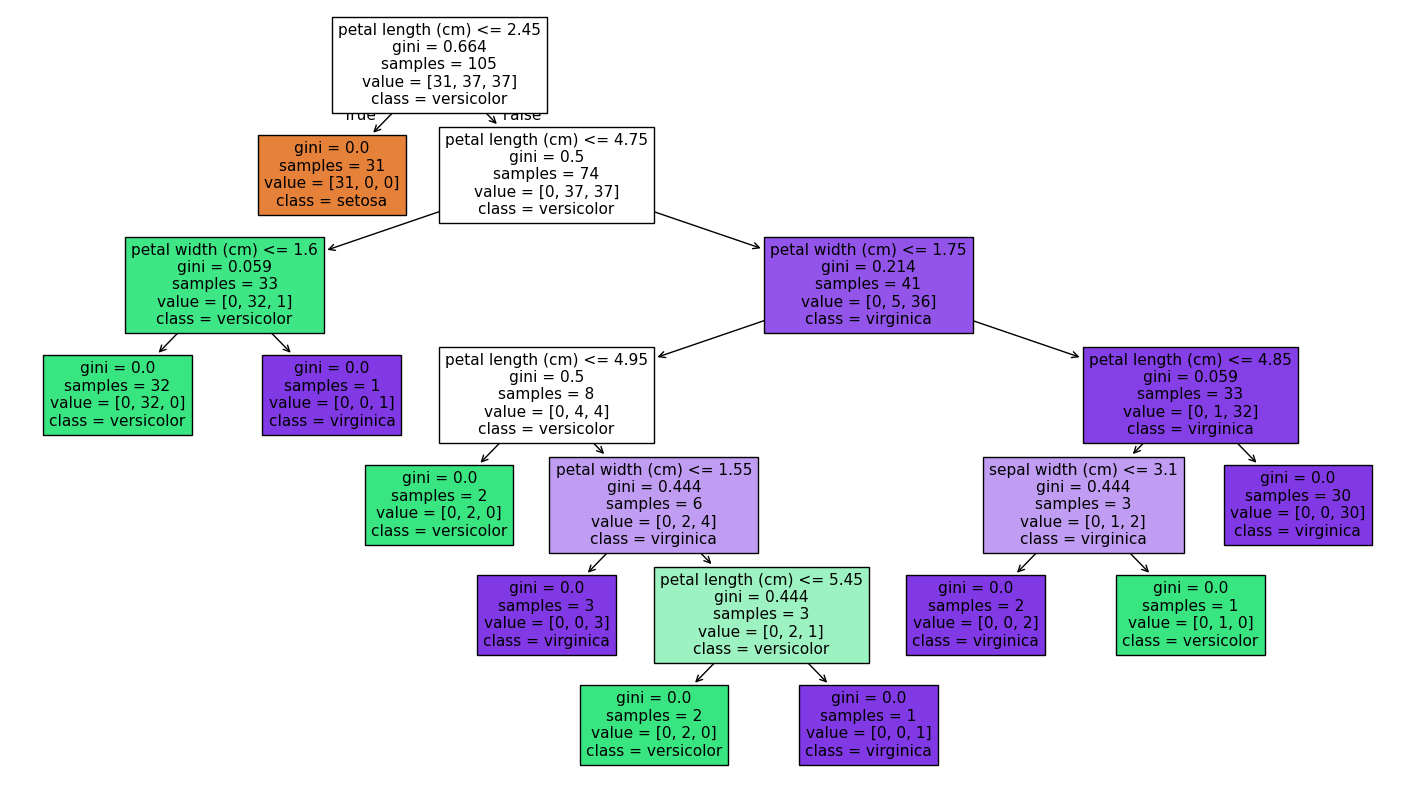

In [5]:
plt.figure(figsize=(18,10))
plot_tree(bad_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


In [6]:
good_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42)

good_model.fit(X_train, y_train)

train_pred_g = good_model.predict(X_train)
test_pred_g = good_model.predict(X_test)

print('Training Accuracy:', accuracy_score(y_train, train_pred_g))
print('Test Accuracy:', accuracy_score(y_test, test_pred_g))

Training Accuracy: 0.9428571428571428
Test Accuracy: 0.9777777777777777


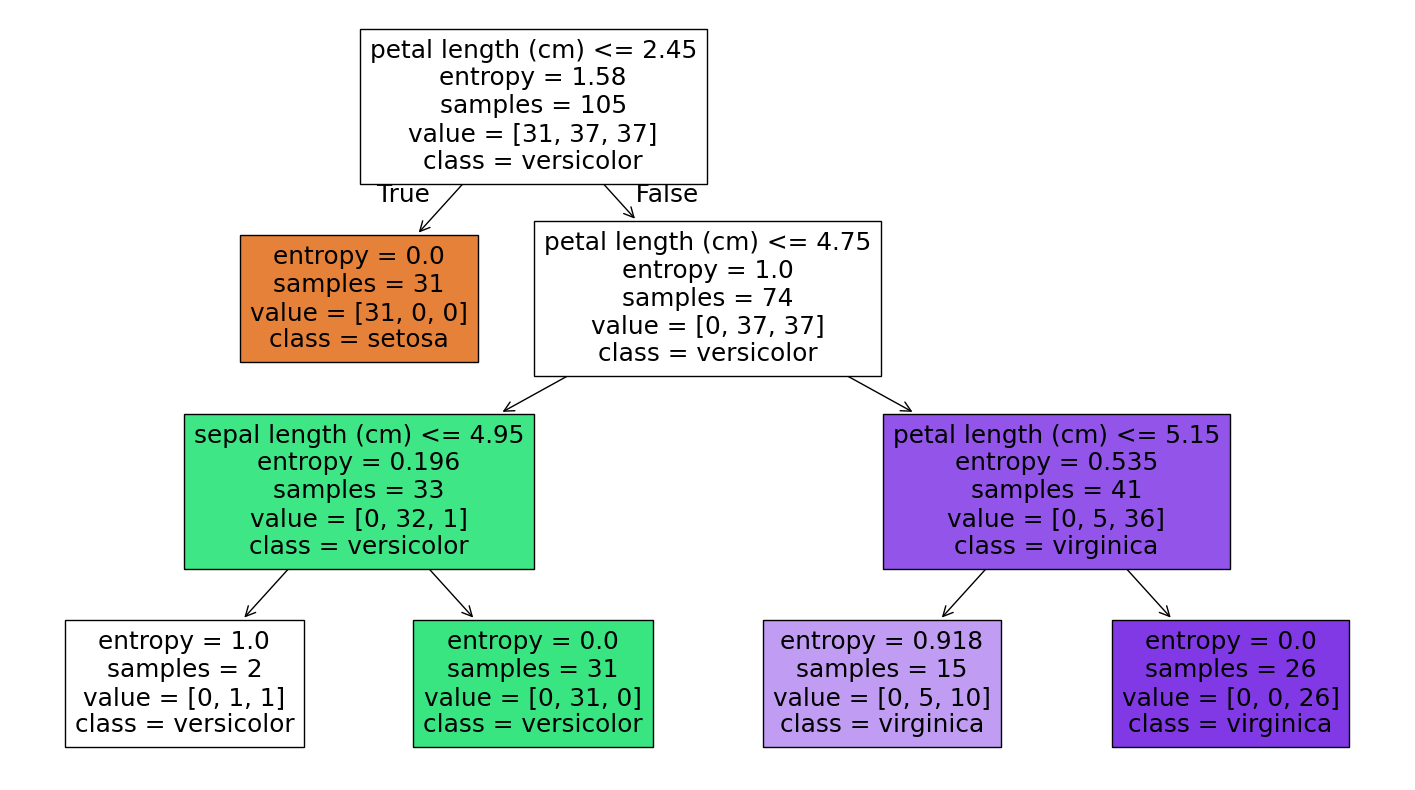

In [7]:
plt.figure(figsize=(18,10))
plot_tree(good_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

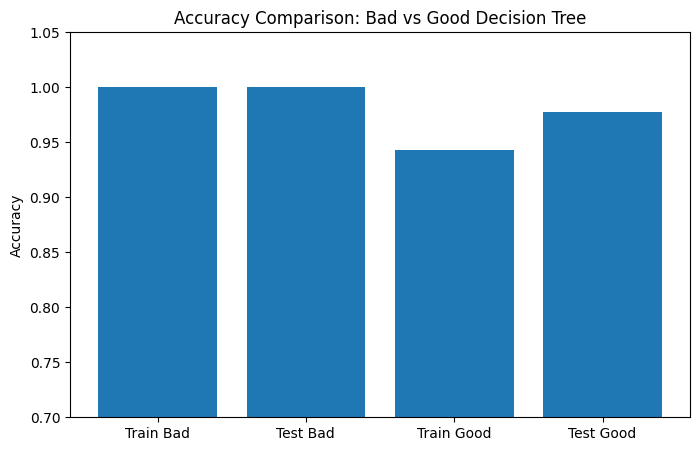

In [8]:
labels = ['Train Bad', 'Test Bad', 'Train Good', 'Test Good']
values = [
    accuracy_score(y_train, train_pred),
    accuracy_score(y_test, test_pred),
    accuracy_score(y_train, train_pred_g),
    accuracy_score(y_test, test_pred_g)
]
plt.figure(figsize=(8,5))
plt.bar(labels, values)
plt.ylim(0.7, 1.05)
plt.title('Accuracy Comparison: Bad vs Good Decision Tree')
plt.ylabel('Accuracy')
plt.show()

In [9]:
# ----------------- INSTALL -----------------
# !pip install gradio scikit-learn

# ----------------- IMPORTS -----------------
import gradio as gr
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# ----------------- LOAD DATA -----------------
iris = load_iris()
X = iris.data
y = iris.target
classes = iris.target_names

# ----------------- TRAIN MODEL -----------------
model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
    random_state=42
)
model.fit(X, y)

# ----------------- PREDICTION FUNCTION -----------------
def predict(sepal_length, sepal_width, petal_length, petal_width):
    data = [[sepal_length, sepal_width, petal_length, petal_width]]
    pred = model.predict(data)[0]
    return f"Predicted Species: {classes[pred]}"

# ----------------- GRADIO UI -----------------
app = gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label="Sepal Length (cm)"),
        gr.Number(label="Sepal Width (cm)"),
        gr.Number(label="Petal Length (cm)"),
        gr.Number(label="Petal Width (cm)")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Iris Flower Classifier (Decision Tree)",
    description="Enter flower measurements to classify Iris species."
)

app.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dfc2ca4383381bef8a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
